# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [45]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
import plotnine as pt

In [40]:
# Code Here
from sklearn.compose import ColumnTransformer

penguins = load_penguins()
penguins.dropna(inplace=True)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island","species"]),
    ("standardize", StandardScaler(), ["bill_length_mm",  "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline


penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [57]:
# Code Here
import sklearn as sk
# Model 1
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)

y_preds = lr_fitted.predict(X_test)

# Predictions for train and test sets
y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)

# Calculate MSE for training and testing data
train_mse1 = sk.metrics.mean_squared_error(y_train, y_train_pred)
test_mse1 = sk.metrics.mean_squared_error(y_test, y_test_pred)
r1 = r2_score(y_test, y_preds)



# Model 2
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex"]),
    ("standardize", StandardScaler(), ["bill_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)


X = penguins[["bill_length_mm", "sex"]]
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)

y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)
r2 = r2_score(y_test, y_preds)
train_mse2 = sk.metrics.mean_squared_error(y_train, y_train_pred)
test_mse2 = sk.metrics.mean_squared_error(y_test, y_test_pred)

# Model 3
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island"]),
    ("standardize", StandardScaler(), ["body_mass_g"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

X = penguins[["island", "sex","body_mass_g"]]
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)

y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)
r3 = r2_score(y_test, y_preds)
train_mse3 = sk.metrics.mean_squared_error(y_train, y_train_pred)
test_mse3 = sk.metrics.mean_squared_error(y_test, y_test_pred)

# Model 4
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","species"]),
    ("standardize", StandardScaler(), ["bill_length_mm",  "flipper_length_mm"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

X = penguins[["species", "sex","bill_length_mm","flipper_length_mm"]]
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fitted = lr_pipeline.fit(X_train, y_train)

y_train_pred = lr_fitted.predict(X_train)
y_test_pred = lr_fitted.predict(X_test)
r4 = r2_score(y_test, y_preds)
train_mse4 = sk.metrics.mean_squared_error(y_train, y_train_pred)
test_mse4 = sk.metrics.mean_squared_error(y_test, y_test_pred)

data = {
    'Model': ["Model 1", "Model 2","Model 3","Model 4",],
    'Number Predictors': [7,2,3,4],
    'R Squared': [r1,r2,r3,r4],
    'RMSE Train': [train_mse1,train_mse2,train_mse3,train_mse4],
    'RMSE Test': [test_mse1,test_mse2,test_mse3,test_mse4]
}

table = pd.DataFrame(data)
table

,Model,Number Predictors,R Squared,RMSE Train,RMSE Test
0,Model 1,7,0.832845,0.623463,0.678497
1,Model 2,2,-0.545057,2.770624,2.774596
2,Model 3,3,-0.789212,1.445456,0.975108
3,Model 4,4,-0.837817,0.677186,0.521524


In [54]:
#Getting the correct structure

table1 = pd.melt(table, id_vars=['Model','Number Predictors'], value_vars=['RMSE Train', 'RMSE Test'], var_name='Type', value_name='Error')
table1

,Model,Number Predictors,Type,Error
0,Model 1,7,RMSE Train,0.629741
1,Model 2,2,RMSE Train,2.892186
2,Model 3,3,RMSE Train,1.334257
3,Model 4,4,RMSE Train,0.612686
4,Model 1,7,RMSE Test,0.690299
5,Model 2,2,RMSE Test,2.449329
6,Model 3,3,RMSE Test,1.147807
7,Model 4,4,RMSE Test,0.719686


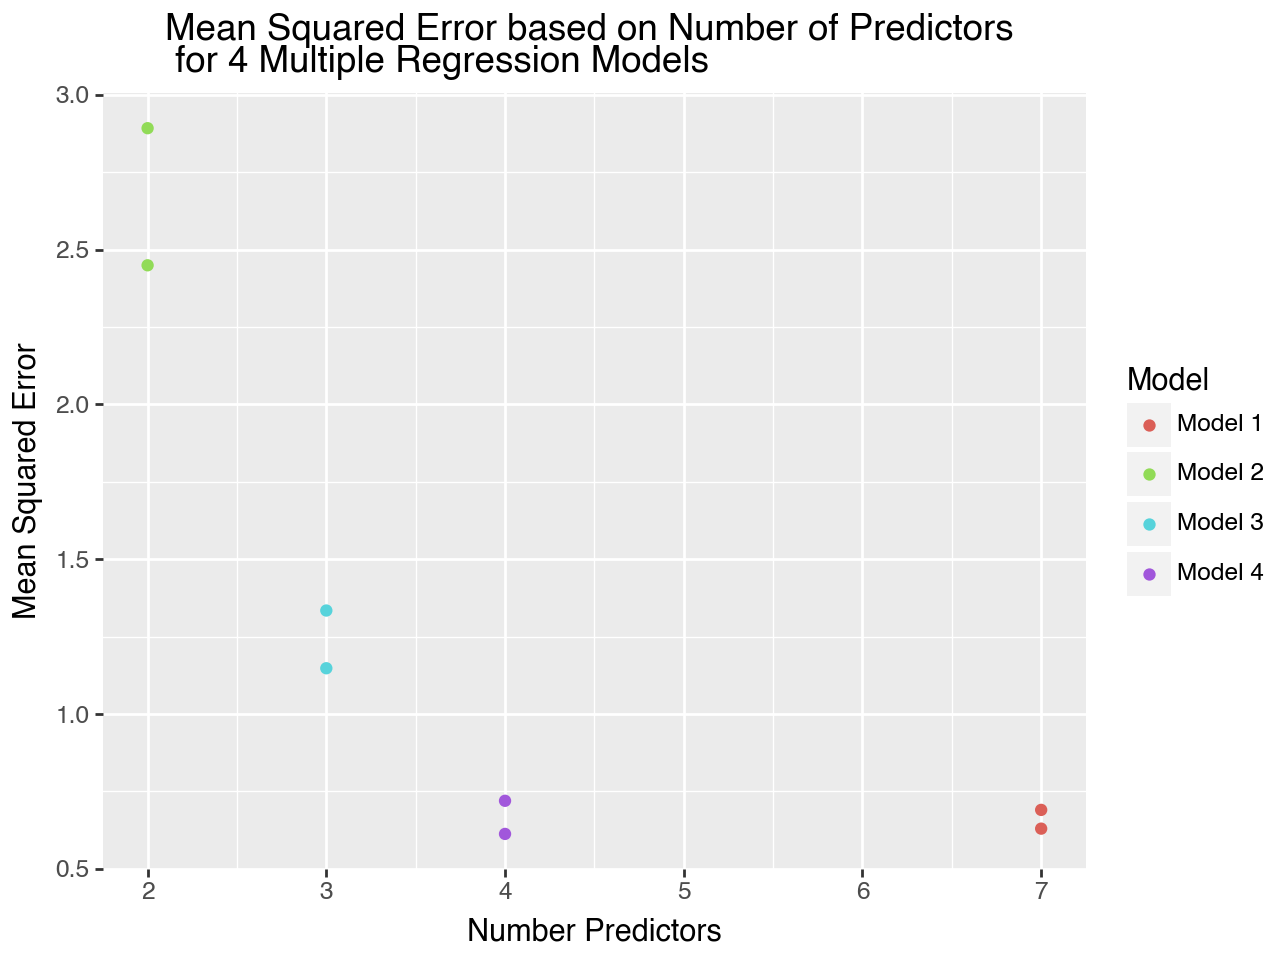

In [59]:
#Graphing
(pt.ggplot(table1, pt.aes(x='Number Predictors',y='Error',color = 'Model'))
 + pt.geom_point()
 + pt.labs(title = "Mean Squared Error based on Number of Predictors \n for 4 Multiple Regression Models",
           y='Mean Squared Error')
 )

From this graph, we can see that Model 1 and Model 4 give us the best predictions for the data because they have the lowest mean squared error. In the graph, the lower point corresponds to the train data and the upper point is for the test data. Both models have very low MSE values for both sets. If we were looking for the most accurate prediction for y, I would pick Model 1 with 7 predictor variables because it uses the most information to find the most accurate prediction. However, if we were looking for significant predictor variables, we might want to take a closer look as to whether any of the variables in Model 1 are redundant, making them unnecessary. In that case, Model 4 (or another model I did not make) could be better for prediction.